11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8370 - loss: 0.5274 - val_accuracy: 0.9838 - val_loss: 0.0520
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9716 - loss: 0.0947 - val_accuracy: 0.9885 - val_loss: 0.0379
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9786 - loss: 0.0710 - val_accuracy: 0.9897 - val_loss: 0.0339
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9841 - loss: 0.0534 - val_accuracy: 0.9927 - val_loss: 0.0269
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9858 - loss: 0.0438 - val_accuracy: 0.9908 - val_loss: 0.0319
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9880 - loss: 0.0406 - val_accuracy: 0.9917 - val_loss: 0.0306
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9896 - loss: 0.0315 - val_accuracy: 0.9925 - val_loss: 0.0308
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0

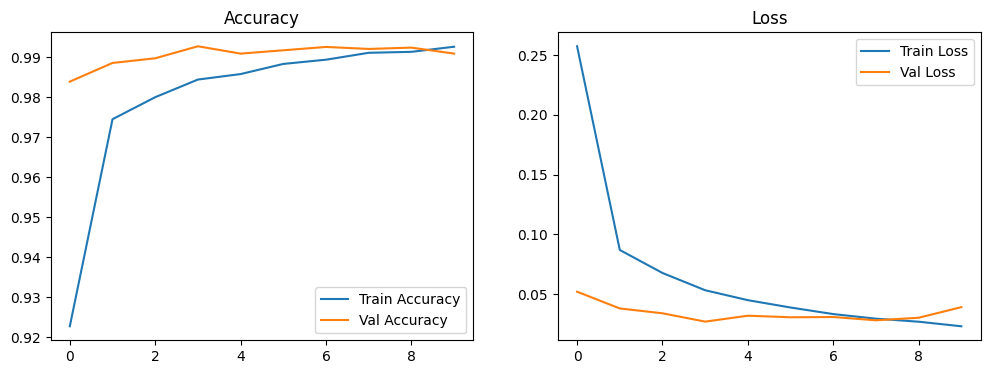

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest Accuracy:", test_acc)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()

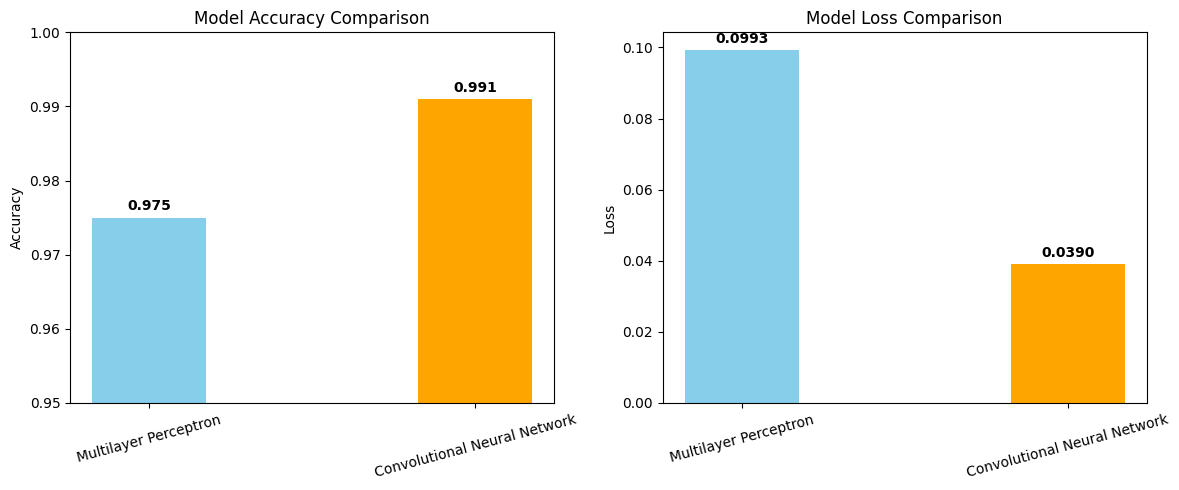

In [2]:
# Comparison Chart for Given MNIST Results

import matplotlib.pyplot as plt
import numpy as np

# Given Results
models = ['Multilayer Perceptron', 'Convolutional Neural Network']
accuracies = [0.975, 0.991]
losses = [0.0993, 0.0390]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(12,5))

# ---------------- Accuracy Chart ----------------
plt.subplot(1,2,1)
bars1 = plt.bar(x, accuracies, width, color=['skyblue','orange'])
plt.xticks(x, models, rotation=15)
plt.ylabel('Accuracy')
plt.ylim(0.95, 1.0)
plt.title('Model Accuracy Comparison')

for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.001, f"{accuracies[i]:.3f}",
             ha='center', fontweight='bold')

# ---------------- Loss Chart ----------------
plt.subplot(1,2,2)
bars2 = plt.bar(x, losses, width, color=['skyblue','orange'])
plt.xticks(x, models, rotation=15)
plt.ylabel('Loss')
plt.title('Model Loss Comparison')

for i in range(len(losses)):
    plt.text(i, losses[i] + 0.002, f"{losses[i]:.4f}",
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()